# Intro: Data Preparation

## Load in Data

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] =(15,5)

In [26]:
def identify_blanks(df):
    t = len(df)
    for each in df.columns:
        i = len(df.loc[df[each].isnull()])
        pct = int((i/t)*100)
        print(f'Column {each} has {i} missing values out of {t}.  {pct}%')
        
# define module to create frequency distribution of variables
def freq_dist(df, col):
    df_fd = pd.DataFrame(data=df[col].value_counts())
    df_fd['pct_total'] = df_fd[col] / df_fd[col].sum()
    print(df_fd.head(15))

    
#Creates Histogram for Comparitive Purposes
def review_detail(df, col, num, col2, num2, sub, meas, type1, stack):    
    if type1 == 'all':
        df_last_month = df.loc[(df[col] != num) & (df[col2] == num2)]
        df_last_month = df_last_month.groupby(by=[col, col2, 'Survived']).agg({'Survived':meas})
        df_last_month.rename(columns = {'index':'index'}, inplace=True)
        df_last_month['pct_total'] = ((df_last_month['Survived'] / df_last_month['Survived'].sum())*100).astype(int)
        df_last_month = pd.DataFrame(df_last_month)
        df_last_month = df_last_month.T
        print(df_last_month)
        df_last_month.drop_duplicates(inplace=True)
        df_last_month = df_last_month.T
        df_last_month.drop(columns=['pct_total'], inplace=True)


        df_last_month.unstack().plot(kind='bar', use_index=True, rot=0, 
                                     subplots=sub, stacked=stack)       
    else:
        df_last_month = df.loc[(df[col] != num) & (df[col2] != num2)]
        df_last_month = df_last_month.groupby(by=[col, col2, 'Survived']).agg({'Survived':meas})
        df_last_month.rename(columns = {'index':'index'}, inplace=True)
        df_last_month['pct_total'] = ((df_last_month['Survived'] / df_last_month['Survived'].sum())*100).astype(int)
        df_last_month = pd.DataFrame(df_last_month)
        df_last_month = df_last_month.T
        print(df_last_month)
        df_last_month.drop_duplicates(inplace=True)
        df_last_month = df_last_month.T
        df_last_month.drop(columns=['pct_total'], inplace=True)


        df_last_month.unstack().plot(kind='bar', use_index=True, rot=0, 
                                     subplots=sub, stacked=stack) 

In [27]:
#Import the data:
test = pd.read_csv('../data/raw/test.csv')
train = pd.read_csv('../data/raw/train.csv')

test['Label'] = 'test'
test['Survived'] = ''
train['Label'] = 'train'

test = test[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Label', 'Survived']]

train = train[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Label', 'Survived']]

## Analyze Data Before Loading to Model

In [28]:
identify_blanks(test)

identify_blanks(train)

Column PassengerId has 0 missing values out of 418.  0%
Column Pclass has 0 missing values out of 418.  0%
Column Name has 0 missing values out of 418.  0%
Column Sex has 0 missing values out of 418.  0%
Column Age has 86 missing values out of 418.  20%
Column SibSp has 0 missing values out of 418.  0%
Column Parch has 0 missing values out of 418.  0%
Column Ticket has 0 missing values out of 418.  0%
Column Fare has 1 missing values out of 418.  0%
Column Cabin has 327 missing values out of 418.  78%
Column Embarked has 0 missing values out of 418.  0%
Column Label has 0 missing values out of 418.  0%
Column Survived has 0 missing values out of 418.  0%
Column PassengerId has 0 missing values out of 891.  0%
Column Pclass has 0 missing values out of 891.  0%
Column Name has 0 missing values out of 891.  0%
Column Sex has 0 missing values out of 891.  0%
Column Age has 177 missing values out of 891.  19%
Column SibSp has 0 missing values out of 891.  0%
Column Parch has 0 missing value

In [29]:
print(test.columns)

print(train.columns)

df = test.append(train)
df.reset_index(inplace=True)

df.shape

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Label', 'Survived'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Label', 'Survived'],
      dtype='object')


(1309, 14)

In [30]:
# importing data sets from kernel 
df['Total'] = 0

rows = len(df)
columns = len(df.columns)
values = rows*columns
non_na = df.count().sum()
na = values-non_na
print('In Data Set:\n')
print('Number of rows:', rows)
print('Number of columns:', columns, '\n')
print('Do any columns contain nulls?', '\n', df.info(), '\n')

identify_blanks(df)

In Data Set:

Number of rows: 1309
Number of columns: 15 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Label        1309 non-null   object 
 13  Survived     1309 non-null   object 
 14  Total        1309 non-null   int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 153.5+ KB
Do any columns contain nulls? 
 None 

Column index has 

In [31]:
print('Data types: \n', test.dtypes, '\n')
print('Unique values: \n', test.nunique())
print('Below is a list of columns that have missing values:')
#Highlight what columns have missing values
[col for col in test.columns if test[col].isnull().any()]

Data types: 
 PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Label           object
Survived        object
dtype: object 

Unique values: 
 PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
Label            1
Survived         1
dtype: int64
Below is a list of columns that have missing values:


['Age', 'Fare', 'Cabin']

In [32]:
# Separate data into categorical and numerical 
df.select_dtypes('object').head(2)

,Name,Sex,Ticket,Cabin,Embarked,Label,Survived
0,"Kelly, Mr. James",male,330911,NaN,Q,test,
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,NaN,S,test,


In [33]:
# check the caragorical variable 
df.select_dtypes('float').head(2)

,Age,Fare
0,34.5,7.8292
1,47.0,7.0000


# Begin to Clean and Analyze Data

## Delimit out the 'Name' column to become more relevant
### Before (below)

In [34]:
df['Name'][0]

'Kelly, Mr. James'

### After (below)

Prefix = Mr

First_Name = Kelly

Last_Name = James

In [35]:
df_name1 = df.Name.str.split(',', expand=True).add_prefix('Name_')
df1 = df.join(df_name1)
df1.rename(columns={'Name_0':'Last_Name', 'Name':'Full_Name', 
                    'Name_1':'Name'}, inplace=True)

df_name2 = df1.Name.str.split('.', expand=True).add_prefix('Name_')
df2 = df1.join(df_name2)

df2.rename(columns={'Name_0':'Prefix', 'Name_1':'Name_Fix'}, inplace=True)
df2.drop(columns=['Name_2'], inplace=True)

df_name3 = df2.Name_Fix.str.split(' ', expand=True).add_prefix('Name_')
df3 = df2.join(df_name3)

df3.rename(columns={'Name_1':'First_Name'}, inplace=True)
df3.drop(columns=['Name_0',
                 'Name_2',
                 'Name_3',
                 'Name_4',
                 'Name_5',
                 'Name_6',
                 'Name_7',
                 'Name_8',
                 'Name_9',
                 'Name_10',
                 'Name_Fix',
                 'Name',
                 'First_Name',
                 'Last_Name',
                 'index',
                 'Full_Name',
                 'Ticket',
                 'Cabin',
                 'PassengerId'], inplace=True)
df3['Prefix'] = df3['Prefix'].str.strip()

In [36]:
df3['Age_factor'] = df3['Sex']+' '+df3['Prefix']+' '+df3['Pclass'].astype(str)
df3['Age_factor'].replace(to_replace='female Ms 3', value='female Ms 2', inplace=True)

In [37]:
df3.select_dtypes('object').head()

,Sex,Embarked,Label,Survived,Prefix,Age_factor
0,male,Q,test,,Mr,male Mr 3
1,female,S,test,,Mrs,female Mrs 3
2,male,Q,test,,Mr,male Mr 2
3,male,S,test,,Mr,male Mr 3
4,female,S,test,,Mrs,female Mrs 3


In [38]:
df3.select_dtypes('number').head()

,Pclass,Age,SibSp,Parch,Fare,Total
0,3,34.5,0,0,7.8292,0
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,0
3,3,27.0,0,0,8.6625,0
4,3,22.0,1,1,12.2875,0


In [39]:
df_age = df3.groupby(by='Age_factor').agg({'Age':'mean'})
df_age['Age_fill'] = df_age['Age']
df_age.drop(columns='Age', inplace=True)

In [40]:
df3.set_index('Age_factor', inplace=True)
df4 = df3.join(df_age)
df4['Age'].fillna(df4['Age_fill'], inplace=True)
df4.reset_index( inplace=True)
df4.drop(columns=['Age_fill','Age_factor'], inplace=True)

In [41]:
df4.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Label,Survived,Total,Prefix
0,1,female,39.0,0,0,108.9000,C,test,,0,Dona
1,1,female,49.0,0,0,25.9292,S,train,1,0,Dr


In [42]:
df4['Fare_factor'] = df4['Prefix']+' '+df4['Pclass'].astype(str)

In [43]:
df_fare = df4.groupby(by='Fare_factor').agg({'Fare':'mean'})
df_fare['Fare_fill'] = df_fare['Fare']
df_fare.drop(columns='Fare', inplace=True)

In [44]:
df4.set_index('Fare_factor', inplace=True)
df5 = df4.join(df_fare)
df5['Fare'].fillna(df5['Fare_fill'], inplace=True)
df5.reset_index( inplace=True)
df5.drop(columns=['Fare_fill','Fare_factor'], inplace=True)

In [45]:
df5.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Label,Survived,Total,Prefix
0,1,male,70.0,1,1,71.0,S,train,0,0,Capt
1,1,male,53.0,0,0,28.5,C,test,,0,Col


In [48]:
#Re-review of missing values after Age and Fare missing values process complete
identify_blanks(df5)

Column Pclass has 0 missing values out of 1309.  0%
Column Sex has 0 missing values out of 1309.  0%
Column Age has 0 missing values out of 1309.  0%
Column SibSp has 0 missing values out of 1309.  0%
Column Parch has 0 missing values out of 1309.  0%
Column Fare has 0 missing values out of 1309.  0%
Column Embarked has 2 missing values out of 1309.  0%
Column Label has 0 missing values out of 1309.  0%
Column Survived has 0 missing values out of 1309.  0%
Column Total has 0 missing values out of 1309.  0%
Column Prefix has 0 missing values out of 1309.  0%


In [50]:
train = df5.loc[df5['Label'] == 'train']

In [51]:
train.select_dtypes('object').head()

,Sex,Embarked,Label,Survived,Prefix
0,male,S,train,0,Capt
3,male,C,train,1,Col
4,male,S,train,0,Col
5,male,C,train,0,Don
7,female,S,train,1,Dr


In [52]:
train.select_dtypes('number').head()

,Pclass,Age,SibSp,Parch,Fare,Total
0,1,70.0,1,1,71.0000,0
3,1,56.0,0,0,35.5000,0
4,1,60.0,0,0,26.5500,0
5,1,40.0,0,0,27.7208,0
7,1,49.0,0,0,25.9292,0


In [53]:
train.shape

(891, 11)

Sex       female      male     
Total          0         0     
Survived       0    1    0    1
Survived      81  233  468  109
pct_total      9   26   52   12


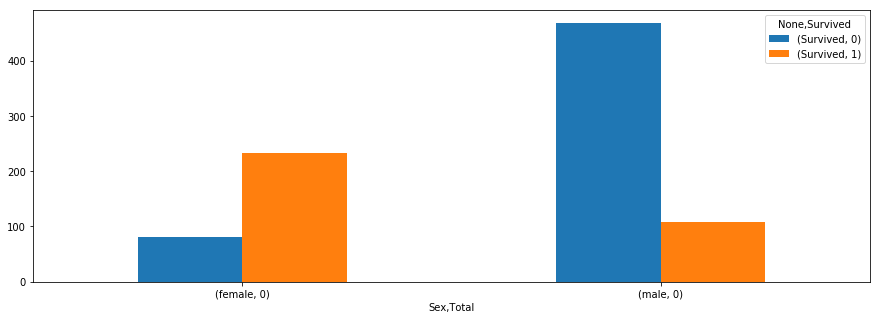

In [54]:
review_detail(train,
              'Sex', "", 
              'Total', '', 
              False,'count','not', False)

Based on the above, there is a clear inverse relationship between survivors sex....

Pclass         1                   2                   3             
Sex       female     male     female     male     female     male    
Survived       0   1    0   1      0   1    0   1      0   1    0   1
Survived       3  91   77  45      6  70   91  17     72  72  300  47
pct_total      0  10    8   5      0   7   10   1      8   8   33   5


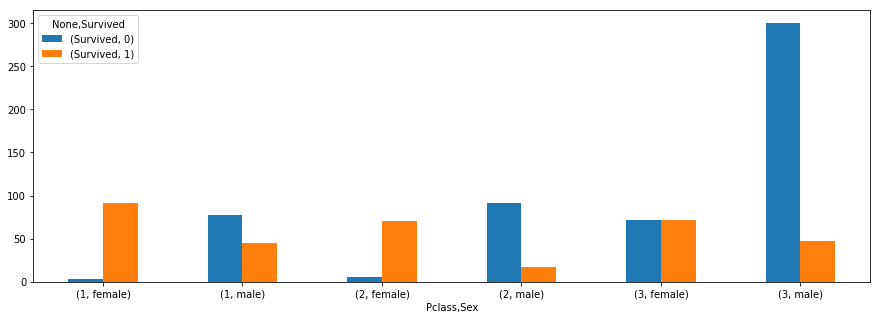

In [55]:
review_detail(train,
              'Pclass', "", 
              'Sex', '', 
              False,'count','not', False)

Based on the above, third class males are significanly disproportionate compared to the rest of the population.

In [56]:
def plot_distribution_num(train, train_select, legend) :
    sns.set_style('ticks')
    s = sns.FacetGrid(train, hue = legend, aspect = 2.5, palette = {1 : 'Lightblue', 0 : 'gold'})
    s.map(sns.kdeplot, train_select, shade = True, alpha = 0.8)
    s.set(xlim=(0, train[train_select].max()))
    s.add_legend()
    s.set_axis_labels(train_select, 'proportion')
    s.fig.suptitle(train_select)
    plt.show()

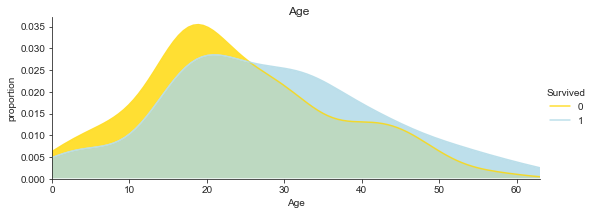

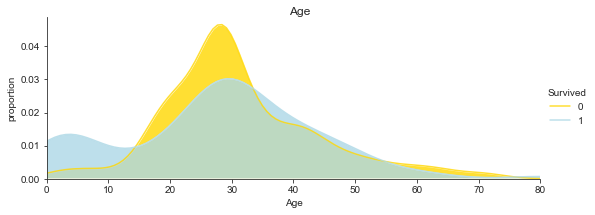

In [57]:
train_female = train.loc[train['Sex'] == 'female']
train_male = train.loc[train['Sex'] == 'male']

plot_distribution_num(train_female, 'Age', 'Survived')
plot_distribution_num(train_male, 'Age', 'Survived')

In [58]:
ea = [train, df5]

m_var = 17
f_var = 50
for ea in ea:
    ea.loc[(ea['Age']<m_var) & (ea['Sex'] == 'male') , 'Age_Bins'] = 'male_under_17'
    ea.loc[(ea['Age']>=m_var) & (ea['Sex'] == 'male'), 'Age_Bins'] = 'male_over_17'
    ea.loc[(ea['Age']<f_var) & (ea['Sex'] == 'female'), 'Age_Bins'] = 'female_under_50'
    ea.loc[(ea['Age']>=f_var) & (ea['Sex'] == 'female'), 'Age_Bins'] = 'female_over_50'

Age_Bins  male_over_17     male_under_17    
Sex               male              male    
Survived             0   1             0   1
Survived           437  85            31  24
pct_total           75  14             5   4


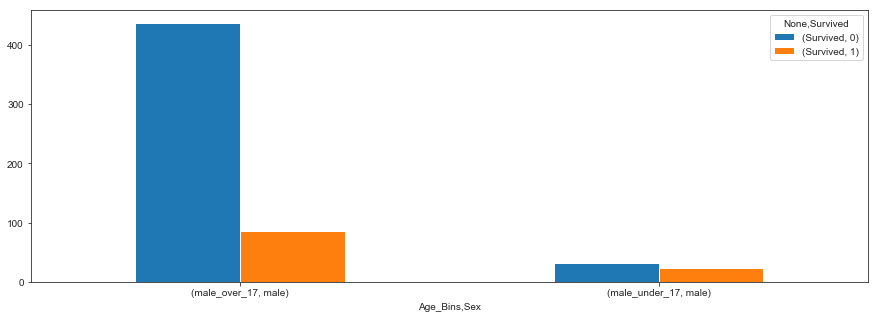

In [59]:
review_detail(train,
              'Age_Bins', "", 
              'Sex', 'female', 
              False,'count','not', False)

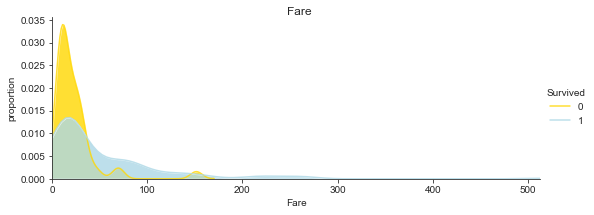

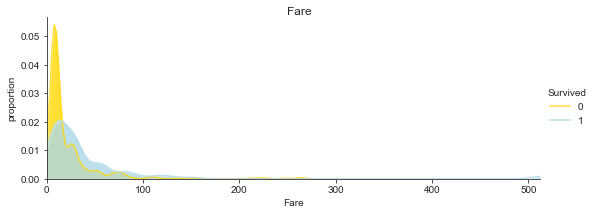

In [60]:
plot_distribution_num(train_female, 'Fare', 'Survived')
plot_distribution_num(train_male, 'Fare', 'Survived')

In [61]:
ea = [train, df5]

var = 50

for ea in ea:
    ea.loc[(ea['Fare']<var), 'Fare_Bins'] = 'Less than $50'
    ea.loc[(ea['Fare']>=var), 'Fare_Bins'] = 'Greater than or equal to $50'

In [62]:
df5.select_dtypes('object').head(2)

,Sex,Embarked,Label,Survived,Prefix,Age_Bins,Fare_Bins
0,male,S,train,0,Capt,male_over_17,Greater than or equal to $50
1,male,C,test,,Col,male_over_17,Less than $50


In [63]:
df5.select_dtypes('number').head(2)

,Pclass,Age,SibSp,Parch,Fare,Total
0,1,70.0,1,1,71.0,0
1,1,53.0,0,0,28.5,0


In [64]:
# review_detail(train,
#               'Prefix', "", 
#               'Total', '', 
#               False,'count','not', True)

Based on the above, the prefix is not very important to the survival rate

In [65]:
# Load cleaned data to begin modeling steps
df5.to_csv('../data/modified/df4.csv')

# Chapter 2: Begin Machine Learning

In [ ]:
train_backup = train

In [ ]:
ea = ['Pclass', 'SibSp', 'Parch', 'Total', 'Survived']

for ea in ea:
    train[ea] = train[ea].astype('object')

In [ ]:
train.select_dtypes('number').head(2)

In [ ]:
# group the categorical columns together
categorical = list(train.select_dtypes('object'))
numerical = list(train.select_dtypes('number'))

In [ ]:
train[numerical].info()

In [ ]:
train

In [ ]:
# Create scaler
scaler = StandardScaler()
# Transform the feature
standardized = scaler.fit_transform (train[numerical])
standardized_df = pd.DataFrame(standardized, columns=['Age', 'Fare'])

In [ ]:
standardized_df

In [ ]:
# Drop the non- scaled numerical columns
train = train.drop(columns = numerical, axis = 1)

In [ ]:
train

In [ ]:
train.head(2)

In [ ]:
standardized_df.head(2)

In [ ]:
# Merge the non-numerical and the scaled numerical columns
train1 = pd.merge(train,standardized_df, left_index=True, right_index=True, how = 'left')

In [ ]:
train1.head(2)

In [ ]:
for ea in train1.select_dtypes('object').columns:
    train1[ea] = train1[ea].astype('category').cat.codes

In [ ]:
train1.head(2)

In [ ]:
identify_blanks(train1)

In [ ]:
# fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15, 5))

# print('Before (Left) \n')
# sns.distplot(train1['Fare'], ax=ax1, color='#36688D')
# Fare = round(train1['Fare'].skew(),5)

# print ('the skew of Fare is', Fare, '\n')
# train1['Fare']= np.sqrt(train1.Fare)

# print('After (Right)')
# sns.distplot(train1['Fare'], ax=ax2, color='#36688D')
# train1['Fare']= np.sqrt(train1.Fare)

# Fare = round(train1['Fare'].skew(),5)
# print ('the skew of Fare is', Fare)

In [ ]:
# # Plot temp on y bar
# fig, (ax7, ax8) = plt.subplots(ncols=2,figsize=(30, 5))
# sns.distplot(train1['Age'], ax=ax7, color='#36688D')
# sns.distplot(train1['Fare'], ax=ax8, color='#36688D')

In [ ]:
train1.columns

In [ ]:
train1.drop(columns='Survived', inplace=True)

In [ ]:
ea = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Label',
       'Total', 'Prefix', 'Age_Bins', 'Fare_Bins']

for ea in ea:
    train1[ea] = train1[ea].astype('object')

train1.info()

In [ ]:
#One-hot Encoding Categorical Variable 
categorical = list(train1.select_dtypes('object'))
train1 = pd.get_dummies(data = train1, columns = categorical, drop_first = True)
train1.head(2)

In [ ]:
categorical = list(train1.select_dtypes('number'))
categorical

In [ ]:
# df.groupby(by=[col, col3, col2]).agg({'Total'+equil:meas})

In [ ]:
# # Plot temp on y bar
# fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15, 5))
# sns.distplot(test['Age'], ax=ax1, color='#36688D')
# sns.distplot(test['Fare'], ax=ax2, color='#36688D')

In [ ]:
# Age = round(test['Age'].skew(),5)
# print ('the skew of Age is', Age) 

# Fare = round(test['Fare'].skew(),5)
# print ('the skew of Fare is', Fare)